# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

In [2]:
import pandas as pd

# importing data
df = pd.read_csv("data/toyota.csv")

# Re arranging df so price if first
df = df[["price", "model", "year", 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']]

df.head()


,price,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,16000,GT86,2016,Manual,24089,Petrol,265,36.2,2.0
1,15995,GT86,2017,Manual,18615,Petrol,145,36.2,2.0
2,13998,GT86,2015,Manual,27469,Petrol,265,36.2,2.0
3,18998,GT86,2017,Manual,14736,Petrol,150,36.2,2.0
4,17498,GT86,2017,Manual,36284,Petrol,145,36.2,2.0


In [3]:
#breakdown + exploring data
df.describe


<bound method NDFrame.describe of       price           model  year transmission  mileage fuelType  tax   mpg  \
0     16000            GT86  2016       Manual    24089   Petrol  265  36.2   
1     15995            GT86  2017       Manual    18615   Petrol  145  36.2   
2     13998            GT86  2015       Manual    27469   Petrol  265  36.2   
3     18998            GT86  2017       Manual    14736   Petrol  150  36.2   
4     17498            GT86  2017       Manual    36284   Petrol  145  36.2   
...     ...             ...   ...          ...      ...      ...  ...   ...   
6733   5500              IQ  2011    Automatic    30000   Petrol   20  58.9   
6734   4985   Urban Cruiser  2011       Manual    36154   Petrol  125  50.4   
6735   4995   Urban Cruiser  2012       Manual    46000   Diesel  125  57.6   
6736   3995   Urban Cruiser  2011       Manual    60700   Petrol  125  50.4   
6737   4495   Urban Cruiser  2011       Manual    45128   Petrol  125  50.4   

      engineSize 

In [4]:
df.dtypes

price             int64
model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [4]:
# assessing all the unique values of model to make sure there are no duplicates or dodgy data
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [5]:
df.shape
#getting an idea of the shape of the data

(6738, 9)

In [6]:
target_variable = ['price']

# independent variables:
numerical_variables: ['year', 'mileage', 'tax', 'mpg', 'engineSize']
    
categorical_variables: ['model', 'transmission', 'fuelType']

               price      year   mileage       tax       mpg  engineSize
price       1.000000  0.420959 -0.297936  0.214498 -0.039910    0.727592
year        0.420959  1.000000 -0.727749  0.283455 -0.020607   -0.045567
mileage    -0.297936 -0.727749  1.000000 -0.205285  0.044889    0.182615
tax         0.214498  0.283455 -0.205285  1.000000 -0.430292    0.155727
mpg        -0.039910 -0.020607  0.044889 -0.430292  1.000000   -0.106868
engineSize  0.727592 -0.045567  0.182615  0.155727 -0.106868    1.000000


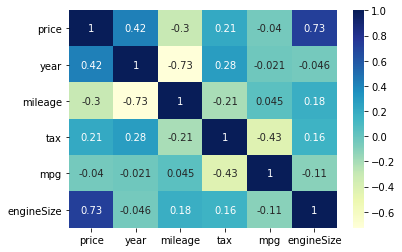

In [7]:
#plotting a correlation plot - to assess numerical correlations
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
  
data = df
  
print(data.corr())

dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

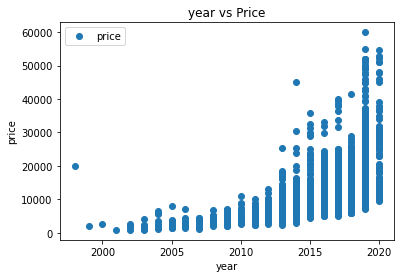

In [8]:
#price vs year plot
df.plot(x='year', y='price', style='o')
plt.title('year vs Price')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

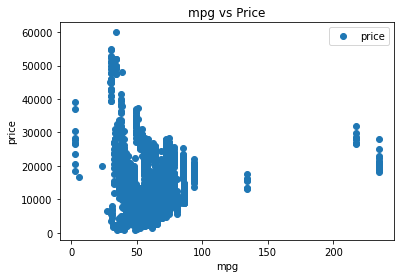

In [13]:
#Price vs mpg plot
df.plot(x='mpg', y='price', style='o')
plt.title('mpg vs Price')
plt.xlabel('mpg')
plt.ylabel('price')
plt.show()

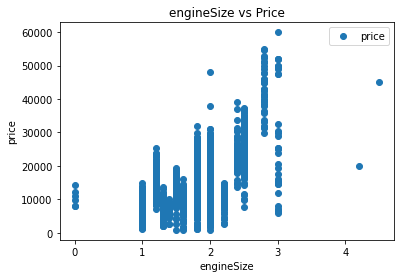

In [14]:
#Price vs engine size plot
df.plot(x='engineSize', y='price', style='o')
plt.title('engineSize vs Price')
plt.xlabel('engineSize')
plt.ylabel('price')
plt.show()

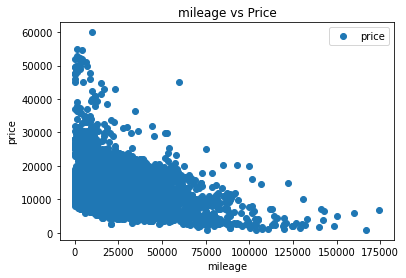

In [15]:
# Mileage vs price plot
df.plot(x='mileage', y='price', style='o')
plt.title('mileage vs Price')
plt.xlabel('mileage')
plt.ylabel('price')
plt.show()

In [4]:
#preping data to split for model training

X = df.loc[:, [ 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'model', 'transmission', 'fuelType']]

y = df['price']

In [5]:
# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])

# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical)

# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [6]:
# scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Auris',
       'model_ Avensis', 'model_ Aygo', 'model_ C-HR', 'model_ Camry',
       'model_ Corolla', 'model_ GT86', 'model_ Hilux', 'model_ IQ',
       'model_ Land Cruiser', 'model_ PROACE VERSO', 'model_ Prius',
       'model_ RAV4', 'model_ Supra', 'model_ Urban Cruiser', 'model_ Verso',
       'model_ Verso-S', 'model_ Yaris', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Diesel', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')

In [7]:
#using train test split to convert data into usable format for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [21]:
#gradient boosting model used
from sklearn.ensemble import GradientBoostingRegressor

# instantiate
lm = GradientBoostingRegressor()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

#Perfomed quite well within time constraints - I'm concious of it overfitting - having more time time to explore different models and assess them whould have been good


0.9556734283740767


In [22]:
#linear regression model used
from sklearn.linear_model import LinearRegression
# instantiate
lm = LinearRegression()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)
# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.927533672435197


In [ ]:
#Kernal kept dropping out testing this model
# from sklearn.ensemble import RandomForestClassifier

# # instantiate
# lm = RandomForestClassifier()
# # fit
# lm.fit(X_train, y_train)
# # predict 
# y_pred = lm.predict(X_test)

# # metrics
# from sklearn.metrics import r2_score
# print(r2_score(y_true=y_test, y_pred=y_pred))